# Modelos de Regresión Linear
## Modelo con datos simulados
* y = a + b * x
* X : 100 valores distribuídos según una N(1.5, 2.5)
* Ye = 5 + 1.7 * x + e
* e estará distribuido según una N(0, 0.8)

In [1]:
import pandas as pd
import numpy as np

In [2]:
x = 1.5 + 2.5 * np.random.randn(100)

In [3]:
res = 0 + 0.8 * np.random.randn(100)

In [4]:
y_pred = 5 + 1.7 * x

In [5]:
y_act = 5 + 1.7 * x + res

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [7]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y_actual":y_act_list,
        "y_prediccion":y_pred_list
    }
)

In [8]:
data.head()

,x,y_actual,y_prediccion
0,2.484583,9.201748,9.223792
1,1.910287,9.414866,8.247489
2,0.159052,6.034435,5.270389
3,-1.223286,2.073480,2.920414
4,2.764770,9.167735,9.700109


In [9]:
import matplotlib.pyplot as plt

In [10]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor actual vs Predicción')

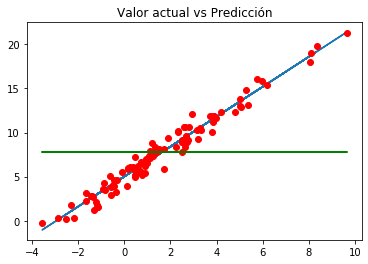

In [11]:
%matplotlib inline
plt.plot(x, y_pred)
plt.plot(x, y_act, "ro") #Valores actuales
plt.plot(x, y_mean, "g")
plt.title("Valor actual vs Predicción")

## ¿Cómo es la predicción de buena?

* SST = SSD + SSR
* SST : Variabilidad de los datos con respecto a su media
* SSD : DIferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberían seguir una distribución normal)
* SSR : Diferencia entre la regresión y el valor medio que el modelo busca explicar 
* R2 = SSR / SST, coeficiente de determinación entre 0 y 1

In [12]:
data["SSR"] = (data["y_prediccion"] - np.mean(y_act))**2
data["SSD"] = (data["y_prediccion"] - data["y_actual"])**2
data["SST"] = (data["y_actual"] - np.mean(y_act))**2

In [13]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,2.484583,9.201748,9.223792,2.174110,0.000486,2.109590
1,1.910287,9.414866,8.247489,0.248186,1.362771,2.774093
2,0.159052,6.034435,5.270389,6.145026,0.583766,2.940780
3,-1.223286,2.073480,2.920414,23.318194,0.717297,32.214996
4,2.764770,9.167735,9.700109,3.805636,0.283422,2.011943


In [14]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [15]:
SSR

1855.7865601674973

In [16]:
SSD # Lo que no se puede explicar por el modelo

64.79923613482606

In [17]:
SST

1945.4061189165095

In [18]:
SSR + SSD

1920.5857963023234

In [19]:
R2 = SSR / SST

In [20]:
R2

0.9539327249577453

(array([ 2.,  1., 11., 14., 23., 20., 10., 13.,  5.,  1.]),
 array([-2.17712714, -1.75032151, -1.32351588, -0.89671025, -0.46990462,
        -0.04309899,  0.38370664,  0.81051227,  1.23731789,  1.66412352,
         2.09092915]),
 <a list of 10 Patch objects>)

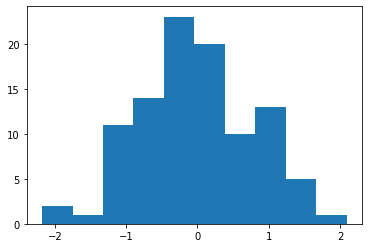

In [21]:
plt.hist(data["y_prediccion"] - data["y_actual"])

## Obteniendo la recta de regresión

* y = a + b * x
* b = sum((xi - x_m)*(y_i - y_m)) / sum((xi - x_m)^2)
* a = y_m - b * x_m

In [22]:
# Obteniendo la media tanto de x como de y
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.6142735956748504, 7.749305373878656)

In [23]:
# Calculando el numerador de beta
data["beta_n"] = (data["x"] - x_mean) * (data["y_actual"] - y_mean)
# Calculando el denominador de beta
data["beta_d"] = (data["x"] - x_mean)**2

In [24]:
beta = sum(data["beta_n"]) / sum(data["beta_d"])

In [25]:
alpha = y_mean - beta * x_mean

In [26]:
# Estos son los valores que en un principio habiamos definido (fecha de cumpleaños)
alpha, beta

(4.986684814719274, 1.7113707159438871)

### El modelo lineal obtenido por regresión es:
y = 4.953078171728445 + 1.7118526118946151 * x

In [27]:
# Valor modelado
data["y_model"] = alpha + beta * data["x"]

In [28]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,2.484583,9.201748,9.223792,2.174110,0.000486,2.109590,1.264075,0.757439,9.238728
1,1.910287,9.414866,8.247489,0.248186,1.362771,2.774093,0.493029,0.087624,8.255895
2,0.159052,6.034435,5.270389,6.145026,0.583766,2.940780,2.495516,2.117669,5.258883
3,-1.223286,2.073480,2.920414,23.318194,0.717297,32.214996,16.105493,8.051744,2.893189
4,2.764770,9.167735,9.700109,3.805636,0.283422,2.011943,1.631899,1.323642,9.718232


In [29]:
SSR = sum((data["y_model"] - y_mean)**2)
SSD = sum((data["y_model"] - data["y_actual"])**2)
SST = sum((data["y_actual"] - y_mean)**2)

In [30]:
SSR, SSD, SST

(1880.6924475023486, 64.71367141416098, 1945.4061189165097)

In [31]:
R2 = SSR / SST
R2

0.9667351352579259

Text(0.5, 1.0, 'Valor actual vs Predicción')

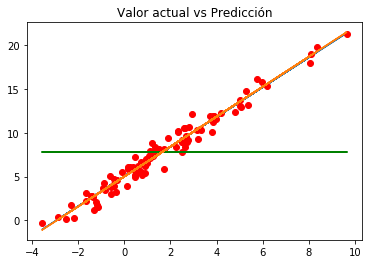

In [32]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

%matplotlib inline
plt.plot(x, y_pred)
plt.plot(x, y_act, "ro") #Valores actuales
plt.plot(x, y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor actual vs Predicción")

## Error estándar de los residuos (RSE)

In [33]:
RSE = np.sqrt(SSD / (len(data) - 2))

In [34]:
RSE

0.8126152754279147

In [35]:
np.mean(data["y_actual"])

7.749305373878656

In [36]:
RSE / np.mean(data["y_actual"])

0.10486298270901502